# iFood CRM Data Analysis Case

## DATA EXPLORATION

#### Library Imports for Data Analysis and Machine Learning


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#### Data Loading & Preliminary Cleaning

Let's load the dataset and take a look at the first few rows to get familiar with its structure.

In [31]:
df = pd.read_csv('../dataset/ifood_df.csv')

Display the first few rows to understand the general layout and content.

In [32]:
print(df.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

 Now, let's check the dimensions of the dataset. This will tell us how many rows and columns we're dealing with.

In [33]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 2205 rows and 39 columns.


Let's also take a look at the data types and see if there are any missing values or issues with data types.

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [35]:
print(df.describe())

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000 

Next, we'll get summary statistics for all numerical columns.
This will give us an overview of the main characteristics like mean, minimum, and maximum values for each variable.

Missing values can cause issues with analysis, so let's check if there are any missing values in our dataset.
We'll list only the columns that have missing values, if any.

In [16]:
missing_values = df.isnull().sum()

Now we'll print out only the columns that have missing values to focus our attention where it's needed.

In [17]:
missing_values[missing_values > 0]

Series([], dtype: int64)

Since the output shows an empty series, it confirms that there are no missing values in any column.
This is great because it means we don't need to deal with data imputation or filling gaps.

Checking for duplicate rows in the dataset.

In [18]:
duplicate_rows = df.duplicated().sum()

If we find any duplicates, we can choose to remove them.

In [20]:
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 184


If there are duplicates and we want to remove them

In [74]:
if duplicate_rows > 0:
    df = df.drop_duplicates()
    print("Duplicate rows have been removed.")

Duplicate rows have been removed.


Let's convert key numeric columns to ensure they're in the right format.
This will replace any non-numeric entries with NaN, so they don't interfere with our analysis.

In [75]:
columns_to_convert = ['Income', 'MntWines', 'MntFruits', 'NumStorePurchases']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

/var/folders/pj/fw7c33gs5m34bn1gfnpy647m0000gn/T/ipykernel_83443/4182129892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


#### Data Exploration & Insights

##### 1. Demographic Profile of Respondents

Income distribution:

Spending power is closely tied to income, and understanding the income profile of respondents can help us target campaigns more effectively. Higher-income customers may spend more, while lower-income customers may prefer budget-friendly offers.
By knowing income distribution, we can segment respondents and create marketing strategies tailored to different income brackets

In [76]:
# Filtering data to only include respondents (those who accepted the last campaign)
respondents = df[df['Response'] == 1]

# Let's check the number of respondents
print(f"Number of respondents: {respondents.shape[0]}")

Number of respondents: 311


In [77]:
average_income = respondents['Income'].mean()
print(f"Average income of respondents: {average_income:.2f}")

Average income of respondents: 60192.91


The higher average income of respondents (60,192) compared to the overall customer base (51,622) suggests that higher-income customers are more engaged with marketing campaigns

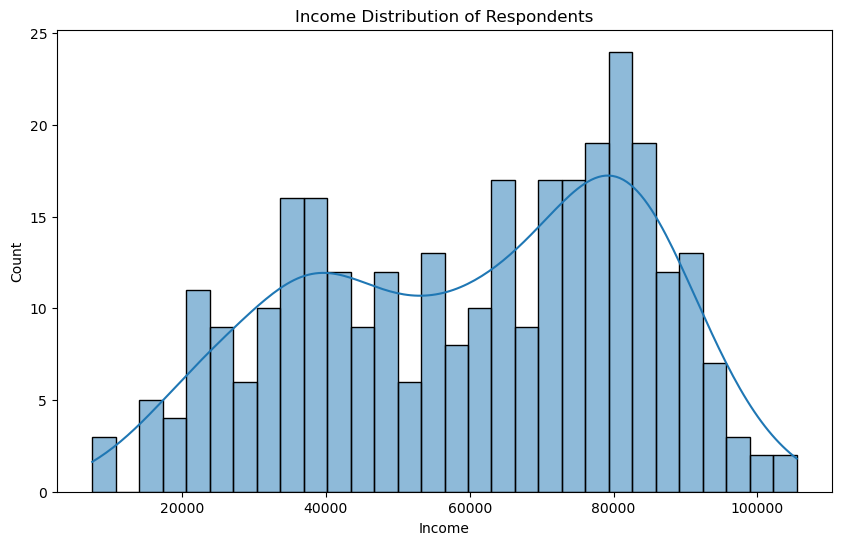

Income Quartiles: 
0.25    39723.5
0.50    64090.0
0.75    80137.5
Name: Income, dtype: float64


In [39]:
# Visualize income distribution
plt.figure(figsize=(10, 6))
sns.histplot(respondents['Income'], bins=30, kde=True)
plt.title('Income Distribution of Respondents')
plt.show()

# Calculate and display income quartiles
income_quartiles = respondents['Income'].quantile([0.25, 0.5, 0.75])
print(f"Income Quartiles: \n{income_quartiles}")

The graph & the income quartiles shows that the majority of respondents have an income between $40,000 & $80,000, with a peak around $80,000. This suggests that marketing campaigns are engaging more with mid-to-high income customers

Conclusion: 

The income analysis shows that respondents are predominantly in the mid-to-high income range, with a median income of $64,090. This suggests that marketing campaigns should continue to target this segment with tailored offers. Additionally, efforts could be expanded to attract lower-income customers by designing more affordable, budget-friendly campaigns, allowing the brand to widen its customer base and drive broader engagement.

##### 2. Educational Level

Educational level often correlates with purchasing power, lifestyle preferences, and types of products purchased. For instance, more educated customers might be drawn to premium or niche products. Understanding which education groups are more engaged can help in peronalizing offers and marketing materials.

In [45]:
# First, let's count how many respondents fall into each education level.
# Since the education levels are separated into columns, we will calculate the sum of respondents for each level.
education_columns = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master','education_PhD']

# Sum the counts for each education level
education_counts = respondents[education_columns].sum()
print("Respondents by education level:")
print(education_counts)

Respondents by education level:
education_2n Cycle       22
education_Basic           2
education_Graduation    142
education_Master         53
education_PhD            92
dtype: int64


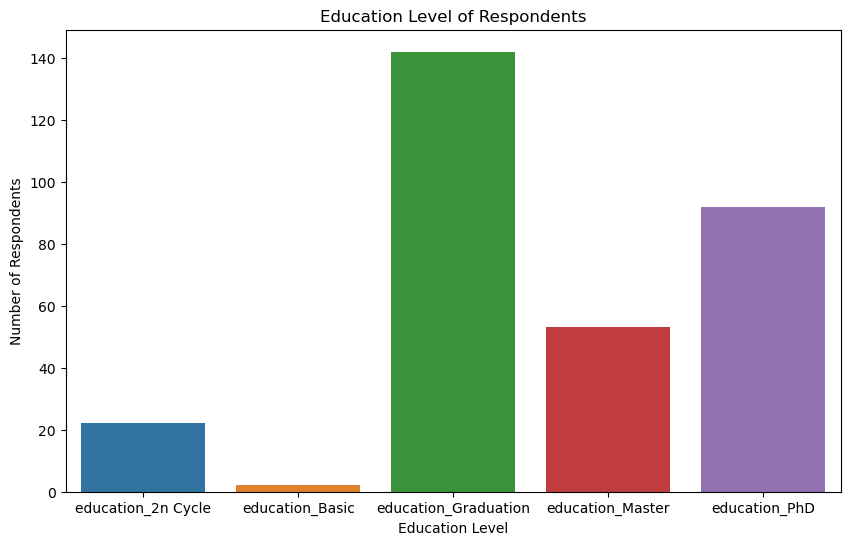

In [47]:
# Now, let's visualize the distribution of education levels.
# We'll create a bar plot to show how many respondents fall under each education category.
plt.figure(figsize=(10,6))
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Education Level of Respondents')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.show()

Based on the distribution of education levels, we can make a few key observation: 

1. **Graduation Dominates**: The majority of respondents (45,6%) have completed a Graduation degree, indicating that most engaged customers have a relatively high level of education. This suggests that campaigns with more detailed or sophisticated messagin resonate well with this group.

2. **Highly Educated Respondents**: A significant portion of respondents hold Master's (17%) or PhD (29,5%) degrees. This reinforces the idea that educated customers are actively engaging with the company's offerings, and they may appreciate data-driven or research-based marketing content.

3. **Basic Education is Rare**: Very few respondents (0,6%) fall into the Basic education category. This suggests that lower-education customers are not as engaged, which could be due to the nature of the products or the messaging of the campaigns


##### 3. Marital Status

Marital status can indicate household spending patterns. Married individuals might be buying for a family, while single/divorced individuals may have different spending habits. By knowing the marital status of respondents, we can tailor family-oriented campaigns or focus on products for single customers.

In [48]:
# The marital status is split across multiple columsn, so let's sum the counts for each category.
marital_columns = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']

# Sum the respondents for each marital status category
marital_counts = respondents[marital_columns].sum()
print("Respondets by Marital Status:")
print(marital_counts)

Respondets by Marital Status:
marital_Divorced     43
marital_Married      92
marital_Single      103
marital_Together     55
marital_Widow        18
dtype: int64


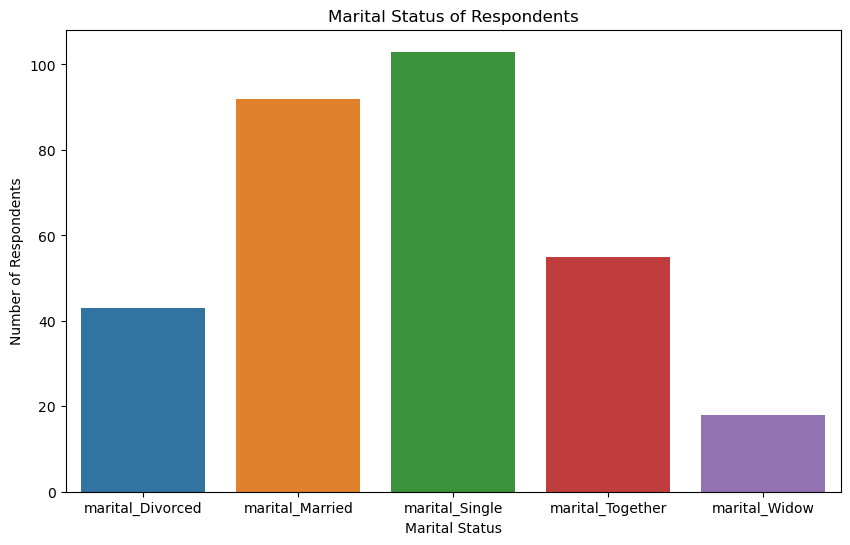

In [49]:
# Now, let's create a bar plot to visualize the marital status distribution. 
# This will give us a clear picture of how respondents are spread across different marital statuses.
plt.figure(figsize=(10,6))
sns.barplot(x=marital_counts.index, y=marital_counts.values)
plt.title('Marital Status of Respondents')
plt.ylabel('Number of Respondents')
plt.xlabel('Marital Status')
plt.show()

**Single** (33%) & **Married** (29.6%) respondents dominate the customer base, making them key targets for marketing efforts. Meanwhile, smaller groups like **Cohabiting** (17.7%) and **Divorced** (13.8%) present opportunities for tailored campaigns, while **Widowed** (5.8%) respondents are the least engagaged.

##### 4. Spending Behavior

Spending behavior reveals which product categories are most popular among customers. By identifying high-spending categories, the marketing team can prioritize these products for promotions, optimize inventory, and tailor campaigns to increase sales in underperforming categories.

In [50]:
# Let's identify the columns that represent the spending across different product categories
spending_columns = ['MntWines', 'MntMeatProducts', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Now we calculate the total spending for each category
total_spending = respondents[spending_columns].sum()

print("Total Spending by Product Category:")
print(total_spending)

Total Spending by Product Category:
MntWines            153682
MntMeatProducts      91874
MntFruits            11901
MntFishProducts      15792
MntSweetProducts     12020
MntGoldProds         19479
dtype: int64


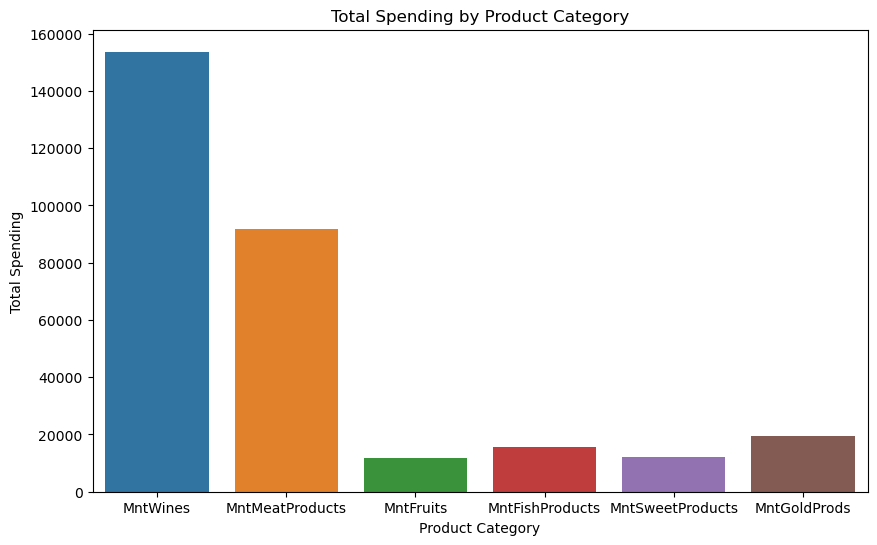

In [51]:
# To make it easier to visualize, we will create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=total_spending.index, y=total_spending.values)
plt.title('Total Spending by Product Category')
plt.ylabel('Total Spending')
plt.xlabel('Product Category')
plt.show()

**Wine** dominates the spending categories, accounting 49.3% of the total spending. This indicates that customers have a strong preference for wines, making it a key product for targeted campaigns.

**Meat products** follow with 29.5% of the total spending suggesting that a significant portion of customers prioritize meat purchases, possibly reflecting higher household or family needs.

**Other categories**, including **Fruits** (3.8%), **Fish** (5.1%), **Sweets** (3.9%), and **Gold Products** (6.2%), represent smaller shares, indicating potential areas for growth through targeted marketing or promotions.

In summary, the focus for future campaigns should be on **Wines and Meat products**, as they contribute the majority of the total spending, while exploring opportunities to boost engagement in lower-spending categories.

##### 5. Purchase Patterns

Analyzing purchase patterns helps the company tailor its marketing strategy by identifyin where customers prefer to shop. If online purchases dominate, the focus can shift to **digital marketing** and improving the **online experience**. If in-store purchases are more common, the business can enhance **in-store promotions** and **loyalty programs** to engage customers effectively. This ensures ressources are allocated where they generate the most impact.

 In-Store vs. Web Purchases: 

This comparison helps determine if customers prefer **in-store shopping** or **online shopping**, which is crucial for shaping marketing strategies, such as increasing investment in the website or creating in-store experiences.

In [56]:
total_store_purchases = respondents['NumStorePurchases'].sum()
total_web_purchases = respondents['NumWebPurchases'].sum()

print('Total Web purchases: ',total_web_purchases)
print('Total In-Store purchases: ',total_store_purchases)

Total Web purchases:  1572
Total In-Store purchases:  1877


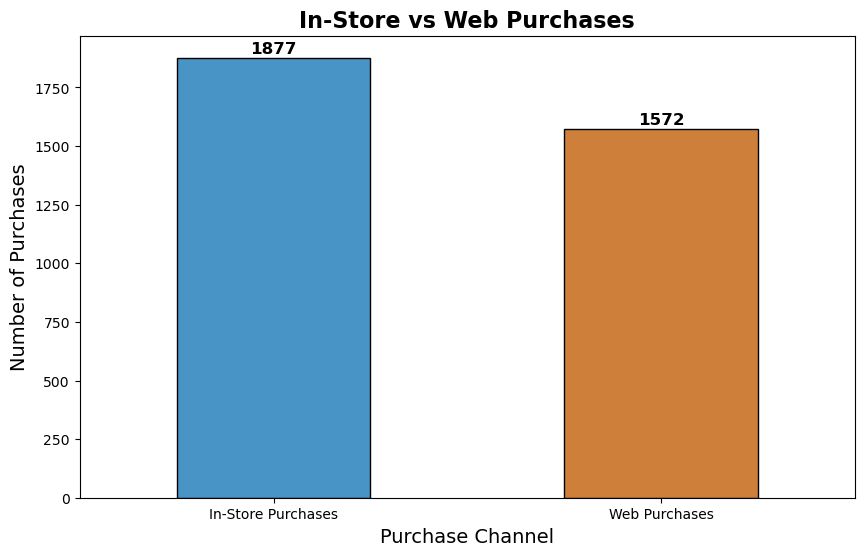

In [78]:
plt.figure(figsize=(10, 6))

colors = ['#3498db', '#e67e22']

sns.barplot(x=['In-Store Purchases', 'Web Purchases'], 
            y=[total_store_purchases, total_web_purchases], 
            palette=colors, edgecolor='black', width=0.5)  

plt.title('In-Store vs Web Purchases', fontsize=16, fontweight='bold')
plt.ylabel('Number of Purchases', fontsize=14)
plt.xlabel('Purchase Channel', fontsize=14)

for i, value in enumerate([total_store_purchases, total_web_purchases]):
    plt.text(i, value + 20, f'{value}', ha='center', fontsize=12, fontweight='bold')

plt.show()


The results show that **54.4%** of purchases were made in-store, while **45.6%** were made online. This indicates a relatively balanced split between the two channels, but a slight preference for in-store shopping.

Most purchases are made in-store, so focusing on physical store promotions can continue to drive sales. However, with nearly half of purchases made online, there's a strong opportunity to grow the online channel through targeted offers and promotions.

Web Engagement: Purchases vs. Visits

This step helps us understand how effective the website is at converting visits into purchases. A high engagement rate means the website performs well in converting traffic into sales, while a low engagement rate moght indicate the need for better user experience or targeted marketing efforts.

In [64]:
total_web_visits = respondents['NumWebVisitsMonth'].sum()

web_engagement_rate = (total_web_purchases / total_web_visits) * 100

print('Web Engagement Rate (Purchase/Visits): ',round(web_engagement_rate,2),'%')

Web Engagement Rate (Purchase/Visits):  95.22 %


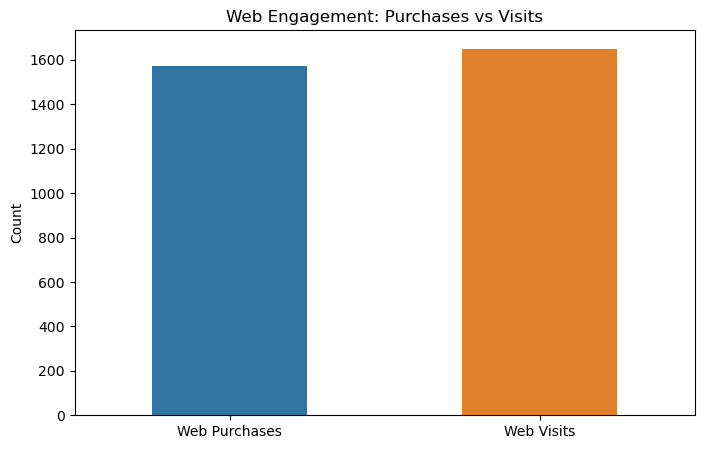

In [68]:
plt.figure(figsize=(8,5))
sns.barplot(x=['Web Purchases','Web Visits'], y=[total_web_purchases, total_web_visits], width=0.5)
plt.title('Web Engagement: Purchases vs Visits')
plt.ylabel('Count')
plt.show()

The web engagement rate is high at **95.22%**, indicating that most visits result in purchases. To further capitalize on this, it would be beneficial to introduce special campaigns or incentives to drive even more traffic to the website, as those who visit are highly likely to convert.

Discount Purchase Analysis

Discount-driven sales can indicate how **sensitive customers are to promotions**. A high percentage of purchases are made with discounts suggests that promotions are an effective tool for driving sales.

In [70]:
total_purchases = respondents[['NumStorePurchases', 'NumWebPurchases']].sum().sum()

discount_purchase_percentage = respondents['NumDealsPurchases'].sum() / total_purchases * 100

print(f"Percentage of Purchases Made with Discounts (Web and In-Store): {discount_purchase_percentage:.2f}%")

Percentage of Purchases Made with Discounts (Web and In-Store): 20.99%


With 21% of purchases being made with discounts, promotions are a significant driver of sales for both web and in-store channels, we can increase targeted discount campaigns, especially for products with lower sales, to further boost customer engagement and overall sales.

##### 6. Household Composition Analysis

We can perform an analysis on **household composition** to understand the customer base in terms of family structure. This can provide insights into product or service needs tailored to household with children or teenagers, which could inform targeted marketing efforts.

In [72]:

# 1. Create a column for the total number of children in each respondent’s household
respondents['TotalChildren'] = respondents['Kidhome'] + respondents['Teenhome']

# 2. Calculate the distribution of household types among respondents
household_distribution = {
    "No Children": len(respondents[(respondents['Kidhome'] == 0) & (respondents['Teenhome'] == 0)]),
    "Small Children Only": len(respondents[(respondents['Kidhome'] > 0) & (respondents['Teenhome'] == 0)]),
    "Teenagers Only": len(respondents[(respondents['Kidhome'] == 0) & (respondents['Teenhome'] > 0)]),
    "Both Children and Teenagers": len(respondents[(respondents['Kidhome'] > 0) & (respondents['Teenhome'] > 0)])
}

# Display the household composition distribution
print("Household Composition Distribution (Respondents):")
for key, value in household_distribution.items():
    print(f"{key}: {value}")

# 3. Calculate average spending by household type
respondents['TotalSpending'] = respondents[['MntWines', 'MntMeatProducts', 'MntFruits', 
                                            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calculate the average spending for each household type
avg_spending = {
    "No Children": respondents[(respondents['Kidhome'] == 0) & (respondents['Teenhome'] == 0)]['TotalSpending'].mean(),
    "Small Children Only": respondents[(respondents['Kidhome'] > 0) & (respondents['Teenhome'] == 0)]['TotalSpending'].mean(),
    "Teenagers Only": respondents[(respondents['Kidhome'] == 0) & (respondents['Teenhome'] > 0)]['TotalSpending'].mean(),
    "Both Children and Teenagers": respondents[(respondents['Kidhome'] > 0) & (respondents['Teenhome'] > 0)]['TotalSpending'].mean()
}

# Display average spending by household type
print("\nAverage Spending by Household Composition (Respondents):")
for key, value in avg_spending.items():
    print(f"{key}: {value:.2f}")


Household Composition Distribution (Respondents):
No Children: 158
Small Children Only: 63
Teenagers Only: 49
Both Children and Teenagers: 41

Average Spending by Household Composition (Respondents):
No Children: 1442.11
Small Children Only: 235.49
Teenagers Only: 985.35
Both Children and Teenagers: 336.00


Households without children have the highest average spending ($1442.11), followed by those with teenager only ($985.35), indicating higher disposable income in these segments. Target marketing should focus on child-free households and products appealing to teens, while families with young children may benefit from budget-friendly offers

##### 7. Heatmap

A heatmap of this dataset would reveal the strength and direction of relationships among variables, particularly for spending behavior, demographics, and response to campaigns. This visualization could give us on which factors most strongly influence customer activity and spending habits, enabling strategic, data-driven marketing initiatives.

Since we're using all customers, this heatmap will consider columns direcly related to customer activiy and behavior, such as Income, Recency, spending in different categories, purchase types, response to campaigns, and family structure. This ensures that we focus on variables that are relevant to understanding and segmenting customer preferences and spending patterns.

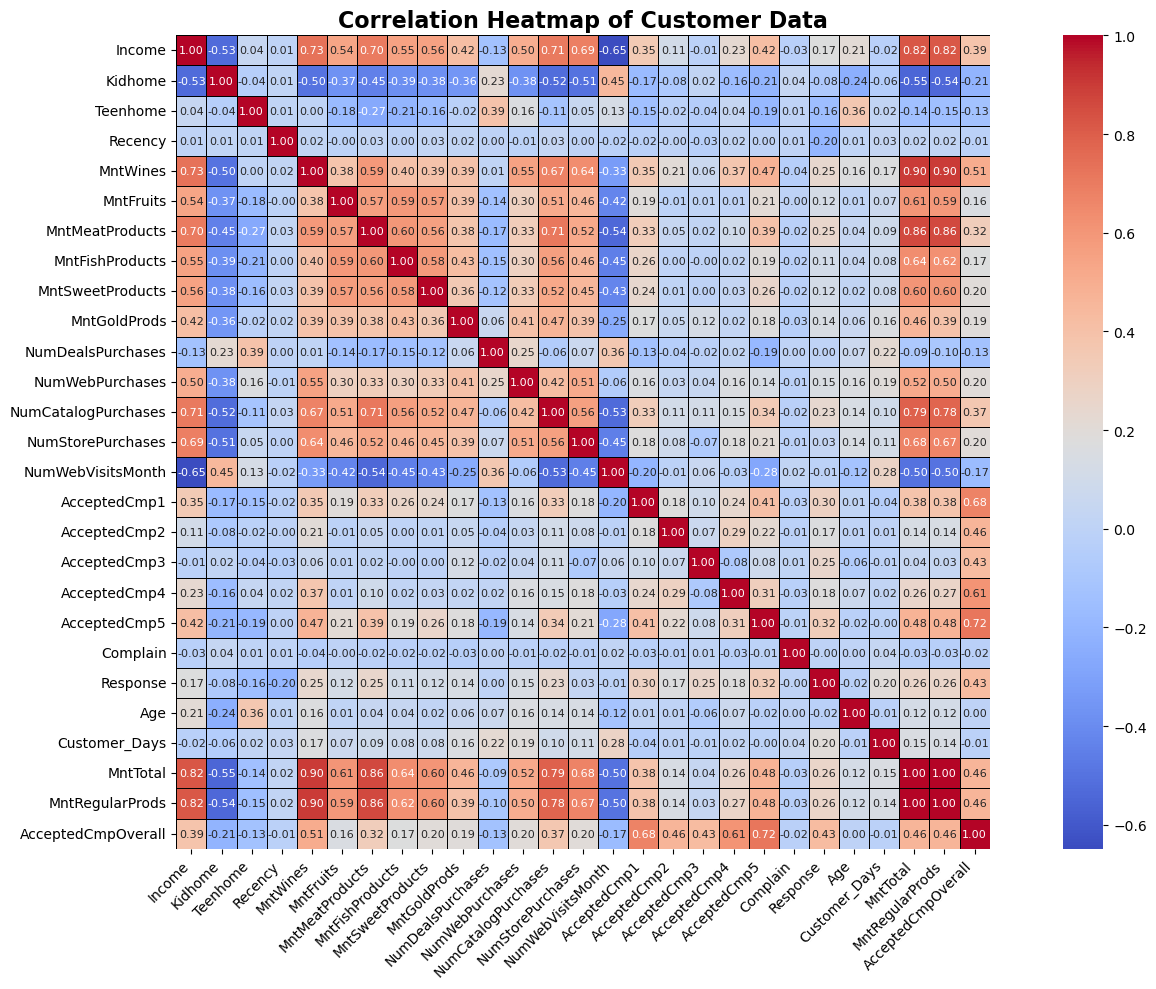

In [73]:
# Select relevant columns for correlation analysis
columns_to_analyze = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'Age', 'Customer_Days', 
    'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'
]

# Calculate the correlation matrix
correlation_matrix = df[columns_to_analyze].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, 
            linewidths=0.5, annot_kws={"size": 8}, linecolor='black')

# Add title for clarity
plt.title('Correlation Heatmap of Customer Data', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout to fit all labels

# Show plot
plt.show()

1- **Income and Spending Patterns**:

There is a strong positive correlation between Income and spending on categories like MntWines (0.73), MntMeatProducts (0.66), and MntGoldProds (0.56). This indicates that higher-income customers tend to spend more on these products, especially on wines.
Marketing efforts could focus on premium offerings for these higher-income segments.

2- **Web Visits and Web Purchases**:

A correlation of 0.53 between NumWebVisitsMonth (web visits) and NumWebPurchases (web purchases) suggests that the more customers visit the website, the more likely they are to make online purchases. This highlights the importance of increasing website traffic through promotions, personalized newsletters, or targetes ads to boost conversion rates.

3- **Recency and Campaign Acceptance**:

The correlation between Recency (days since last purchase) and campaign acceptance variables like AcceptedCmp1 or AcceptedCmp2 is relatively low. This suggests that customers who made recent purchases aren't necessarily more inclined to accept marketing offers. Targeting these customers with more personalized campaigns could imporove engagement.

4- **Overall Spending Patterns**:

MntTotal (total spending) has a strong correlation with individual product categories, particularly MntWines (0.79) and MntMeatProducts (0.72). This shows that wine and meat products significantly contribute to total customer spending, making them key categories to focus on for upselling ot loyalty strategies.

5- **Web Visits and Income**:
 
There's a negative correlation (-0.65) between Income and NumWebVisitsMonth. This suggests that higher-invome customers thend to visit the website less frequently. This insight points to the potential for offering more personalized or exclusiv web experiences to engage this lucrative segment more effectively.

## SEGMENTATION